In [ ]:
'''Apesar das acc do desbalanceados e do undersampling serem na caso dos 70%, ao olhar a matrix de confusão
é póssivel notar que tanto a especificidade e a sensibilidade não condizem com um bom resultado.
Já para o oversampling, temos um resultado bem mais equilibrado.

Obs.: Do ponto de vista do que é mais metodologicamente correto, usar dados sintéticos nos teste é um erro.

'''

In [72]:
#Classificação com Random Forest
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [73]:
#carregando base
dataset = pd.read_csv('./csv_result-ebay_confianca_completo.csv')
dataset.shape

(5806, 75)

In [74]:
dataset.head()

feedbacks  reviews blacklist  mextraversion  cextraversion  sextraversion  \
2          0       49         N       4.181642            0.6              1   
3          0       56         N       4.007042            0.6              0   
4          0       50         N       4.538230            0.7              1   
5         72        0         N       4.692854            0.3              0   
6         76        0         N       4.966753            0.3              0   

   mneuroticism  cneuroticism  sneuroticism  mconscientiousness  ...  \
2      2.777591           0.6             0            4.085460  ...   
3      2.698650           0.6             0            4.187338  ...   
4      2.298492           0.5             1            5.085833  ...   
5      2.987231           0.5             0            4.831320  ...   
6      3.048730           0.5             0            4.725294  ...   

   need_practicaly  need_selfexpression  need_stability  need_structure  \
2         0.696359             0.698786        0.756963        0.660119   
3         0.715300             0.664572        0.728806        0.660740   
4         0.720150             0.694678        0.669652        0.627962   
5         0.739793             0.637027        0.697221        0.638587   
6         0.718530             0.616852        0.692761        0.646695   

   value_conservation  value_openess  value_hedonism  value_selfenhancement  \
2            0.619416       0.746372        0.640073               0.598037   
3            0.588969       0.735915        0.644465               0.603042   
4            0.553523       0.766618        0.655470               0.645042   
5            0.675289       0.752234        0.679661               0.674438   
6            0.677245       0.699785        0.648607               0.616075   

   value_selftranscendence  reputation  
2                 0.828716         Bom  
3                 0.809379         Bom  
4                 0.826039         Bom  
5                 0.813391         Bom  
6                 0.816841         Bom  

[5 rows x 75 columns]

In [75]:
#apagando registros não completos (que falta algum dos atributos)
dataset.dropna(inplace=True)
dataset.shape

(5806, 75)

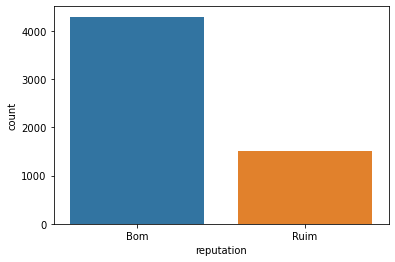

In [76]:
sns.countplot( x = dataset['reputation']);

In [77]:
#tirando os atributos não numericos
dataset['blacklist'] = dataset['blacklist'] == 'S'
dataset['blacklist'] = dataset['blacklist'].astype('int')

#Bom =1
#Ruim =0
dataset['reputation'] = dataset['reputation'] == 'Bom'
dataset['reputation'] = dataset['reputation'].astype('int')
dataset.head()

feedbacks  reviews  blacklist  mextraversion  cextraversion  sextraversion  \
2          0       49          0       4.181642            0.6              1   
3          0       56          0       4.007042            0.6              0   
4          0       50          0       4.538230            0.7              1   
5         72        0          0       4.692854            0.3              0   
6         76        0          0       4.966753            0.3              0   

   mneuroticism  cneuroticism  sneuroticism  mconscientiousness  ...  \
2      2.777591           0.6             0            4.085460  ...   
3      2.698650           0.6             0            4.187338  ...   
4      2.298492           0.5             1            5.085833  ...   
5      2.987231           0.5             0            4.831320  ...   
6      3.048730           0.5             0            4.725294  ...   

   need_practicaly  need_selfexpression  need_stability  need_structure  \
2         0.696359             0.698786        0.756963        0.660119   
3         0.715300             0.664572        0.728806        0.660740   
4         0.720150             0.694678        0.669652        0.627962   
5         0.739793             0.637027        0.697221        0.638587   
6         0.718530             0.616852        0.692761        0.646695   

   value_conservation  value_openess  value_hedonism  value_selfenhancement  \
2            0.619416       0.746372        0.640073               0.598037   
3            0.588969       0.735915        0.644465               0.603042   
4            0.553523       0.766618        0.655470               0.645042   
5            0.675289       0.752234        0.679661               0.674438   
6            0.677245       0.699785        0.648607               0.616075   

   value_selftranscendence  reputation  
2                 0.828716           1  
3                 0.809379           1  
4                 0.826039           1  
5                 0.813391           1  
6                 0.816841           1  

[5 rows x 75 columns]

In [78]:
#divisão de atributos
#Corta o id e o rotulo reputation
X = dataset.iloc[:,1:74].values
X.shape

(5806, 73)

In [79]:
#classes
y = dataset.iloc[:, 74].values
y.shape

(5806,)

In [80]:
# 20% para teste e 80% para treinamneto
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4644, 73), (4644,), (1162, 73), (1162,))

In [81]:
#treinamento sem balanceamento

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
previsoes = modelo.predict(X_test)
accuracy_score(previsoes,y_test)

0.7469879518072289

In [83]:
matrix = confusion_matrix(previsoes,y_test)
matrix

array([[ 13,   5],
       [289, 855]], dtype=int64)

In [84]:
sns.heatmap(matrix, annot =True)

<AxesSubplot:>

In [85]:
#utiliznaod undersampling
tl = TomekLinks()
tl.return_indices=True
tl.ratio='majority'
X_under,y_under = tl.fit_sample(X,y)
X_under.shape,y_under.shape

((5445, 73), (5445,))

In [86]:
X_train_u,X_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.2,stratify=y_under)
X_train_u.shape,X_test_u.shape,y_train_u.shape,y_test_u.shape

((4356, 73), (1089, 73), (4356,), (1089,))

In [87]:
#criação do modelos undersamples
modelo_u= RandomForestClassifier()
#treinamento
modelo_u.fit(X_train_u,y_train_u)
previsoes_u = modelo_u.predict(X_test_u)
#acc geral
accuracy_score(previsoes_u,y_test_u)

0.7337006427915519

In [88]:
matrix_u = confusion_matrix(previsoes_u, y_test_u)
matrix_u

array([[ 16,   5],
       [285, 783]], dtype=int64)

In [89]:
sns.heatmap(matrix_u, annot =True)

<AxesSubplot:>

In [90]:
#Utilizando oversampling
smote = SMOTE()
smote.ratio='minority'
X_over,y_over = smote.fit_sample(X,y)
X_over.shape,y_over.shape

((8598, 73), (8598,))

In [91]:
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(X_over,y_over,test_size=0.2,stratify=y_over)
X_train_o.shape,X_test_o.shape,y_train_o.shape,y_test_o.shape

((6878, 73), (1720, 73), (6878,), (1720,))

In [92]:
#criação do modelos oversamples
modelo_o = RandomForestClassifier()
#treinamento
modelo_o.fit(X_train_o,y_train_o)
previsoes_o = modelo_o.predict(X_test_o)
#acc geral
accuracy_score(previsoes_o,y_test_o)

0.8215116279069767

In [93]:
matrix_o = confusion_matrix(previsoes_o, y_test_o)
matrix_o

array([[714, 161],
       [146, 699]], dtype=int64)

In [94]:
sns.heatmap(matrix_o, annot =True)

<AxesSubplot:>